<a href="https://colab.research.google.com/github/kae4ka/neural_networks_course/blob/main/INS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)

# 1. Обучение однослойного персептрона решению линейно разделимых задач. Функции «And» и «Or». Метод простого перебора



* Два входа, один выход
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая
* Значения весов перебирать в цикле (например, от -1 до +1 с шагом 0.1)
* Ошибку считать по МНК
* Запоминать все значения весов, при которых ошибка равна 0

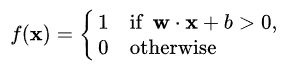

In [ ]:
import numpy as np
import pandas as pd

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
w_or = []
w_and = []
y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1],
                  'OR': y_or, 'AND': y_and},
                  columns=['X1', 'X2', 'OR', 'AND'])
df

,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def step_func(u):
        return 1 if (u > 0) else 0

In [ ]:
def perceptron(x, y, weights):
  for i in np.arange(-1.0, 1.1, 0.1):
    for j in np.arange(-1.0, 1.1, 0.1):
      for q in np.arange(-1.0, 1.1, 0.1):
        fail = 0
        w = np.array([i, j, q])
        for k, m in np.array(list(zip(x, y))):
            k = np.insert(k, len(k), 1, axis=0)
            y_pred = np.matmul(k, w.T)
            y_pred = step_func(y_pred)
            err = m - y_pred
            if err != 0:
              fail += 1
        if fail == 0:
          weights.append(w)

In [ ]:
perceptron(x, y_or, w_or)
perceptron(x, y_and, w_and)

for k in x:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred = np.dot(k, w_or[0].T)
  y_pred_or.append(step_func(y_pred))
  y_pred = np.dot(k, w_and[0].T)
  y_pred_and.append(step_func(y_pred))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 2.	Обучение однослойного персептрона  методами направленного обучения (по аналогии с советчиками)

* То же самое, что и ЛР№1, но используется не перебор, а направленное обучение
* Веса корректируются исходя из ошибки
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая. Предпочтительней – sign(x)
* Начальное значение весов берем случайно
* Последующее значение – wi+1 = wᵢ + Δw
* Δwᵢ = ɛ * x * d * |wᵢ|
* d = A – Y ошибка (разность между эталонным и расчетным значениями) 

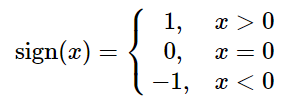

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])
W_or = np.random.rand(3,)
W_and = np.random.rand(3,)

y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'OR': Y_or, 'AND': Y_and},
                  columns = ['X1', 'X2', 'OR', 'AND'])
df

[0.60711887 0.5786569  0.15893013]


,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def sign(u):
  return 1 if (u > 0) else 0 

In [ ]:
def perceptron(x_i, w):
  sum = np.matmul(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

In [ ]:
def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
  for iter_num in range(num_iter):
    for x_i, y_i in np.array(list(zip(x, y))):
      x_i = np.insert(x_i, len(x_i), b, axis = 0)
      y_pred = perceptron(x_i, w)
      err = y_i - y_pred
      w += lr*err*x_i
  return w

In [ ]:
W_or = np.copy(training(X, Y_or, W_or))
W_and = np.copy(training(X, Y_and, W_and))

for k in X:
  k = np.insert(k, len(k), 1, axis = 0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

In [ ]:
df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 3.	Обучение многослойной нейронной сети решению линейно неразделимых задач. Функция «Exclusive Or»

* То же самое, что и Лаб. 2, но используется многослойный персептрон
* НС: 2 слоя, 2 входа, 1 выход

In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])

Y_xor = np.array([0, 1, 1, 0])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])

W_or = np.random.rand(3,)
W_and = np.random.rand(3,)
W_not = np.random.rand(2,)

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1],
                  'OR': Y_or, 'AND': Y_and, 'XOR': Y_xor},
                  columns=['X1', 'X2', 'OR', 'AND', 'XOR'])
df

,X1,X2,OR,AND,XOR
0,0,0,0,0,0
1,0,1,1,0,1
2,1,0,1,0,1
3,1,1,1,1,0


In [ ]:
X_not = np.array([[0], [1]])
Y_not = np.array([1, 0])

df_not = pd.DataFrame({'X': X_not[:, 0], 'NOT': Y_not},
                  columns=['X', 'NOT'])
df_not

,X,NOT
0,0,1
1,1,0


In [ ]:
def sign(u):
  return 1 if (u > 0) else 0

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
    for iter_num in range(num_iter):
      for x_i, y_i in np.array(list(zip(x, y))):
        x_i = np.insert(x_i, len(x_i), b, axis = 0)
        y_pred = perceptron(x_i, w)       
        err = y_i - y_pred
        w += lr*err*x_i
    return w

In [ ]:
# обучение логическому ИЛИ
W_or = np.copy(training(X, Y_or, W_or))
# обучение логическому И
W_and = np.copy(training(X, Y_and, W_and))

y_pred_or = []
y_pred_and = []

for k in X:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

df

,X1,X2,OR,OR_pred,AND,AND_pred,XOR
0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1
2,1,0,1,1,0,0,1
3,1,1,1,1,1,1,0


In [ ]:
# обучение логическому НЕ
W_not = np.copy(training(X_not, Y_not, W_not))

y_pred_not = []

for k in X_not:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_not.append(perceptron(k, W_not))

df_not.insert(2, "NOT_pred", y_pred_not, True)

df_not

,X,NOT,NOT_pred
0,0,1,1
1,1,0,0


In [ ]:
def XOR_perceptron(x):
	x = np.insert(x, len(x), 1, axis = 0)
 
	h_and = perceptron(x, W_and.T)
	h_or = perceptron(x, W_or.T)
	h_and = np.array([h_and, 1])
	h_not_and = perceptron(h_and, W_not.T)
 
	h = np.array([h_or, h_not_and])
	h = np.insert(h, len(h), 1, axis = 0)
	y_pred = perceptron(h, W_and.T)
	return y_pred

In [ ]:
y_pred_xor = []

for k in X:
  y_pred_xor.append(XOR_perceptron(k))

df.insert(7, "XOR_pred", y_pred_xor, True)

df

,X1,X2,OR,OR_pred,AND,AND_pred,XOR,XOR_pred
0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1,1
2,1,0,1,1,0,0,1,1
3,1,1,1,1,1,1,0,0


# 4.	Обучение многослойной нейронной сети по методу обратного распространения ошибки.

* То же самое, что и Лаб. 3, но уже используется метод градиентного спуска и алгоритм обратного распространения ошибки
* НС: 3 слоя 3 входа, 1 выход

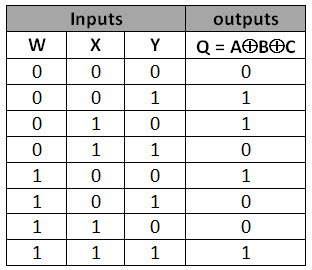

In [ ]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0, 1, 1, 0]]).T

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y': Y[:, 0]},
                  columns=['X1', 'X2', 'Y'])
df

,X1,X2,Y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

Y = np.array([[0, 1, 1, 0, 1, 0, 0, 1]]).T

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'X3': X[:, 2], 'Y': Y[:, 0]},
                  columns=['X1', 'X2', 'X3', 'Y'])
df

,X1,X2,X3,Y
0,0,0,0,0
1,0,0,1,1
2,0,1,0,1
3,0,1,1,0
4,1,0,0,1
5,1,0,1,0
6,1,1,0,0
7,1,1,1,1


In [ ]:
num_data, input_dim = X.shape

In [ ]:
output_dim = len(Y.T)

In [ ]:
def sign(u):
  return 1 if (u > 0) else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1.0 - x)

def squared_err(y, y_pred):
  return 0.5 * (y - y_pred)**2

def squared_err_derivative(y, y_pred):
  return y - y_pred

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sigmoid(sum)
  return y_pred

In [ ]:
np.random.seed(42)
lr = 0.1
num_iter = 10000
hidden_dim = 3
W1 = np.random.random((input_dim, hidden_dim))
W2 = np.random.random((hidden_dim, output_dim))
b1 = np.random.random(size=(num_data,1))
b2 = np.random.random(size=(1,1))
losses = []
grad = np.zeros((3,1))
for _ in range(num_iter):
  # for x_i, y_i in np.array(list(zip(X, Y))):
      # feedforward
      layer0 = X
      layer1 = sigmoid(np.dot(layer0, W1) + b1)
      layer2 = sigmoid(np.dot(layer1, W2) + b2)

      # calc loss
      loss = -(1/2)*np.sum(Y*np.log(layer2)+(1-Y)*np.log(1-layer2))
      losses.append(loss)

      # # backprop
      layer2_err = squared_err_derivative(Y, layer2) * sigmoid_derivative(layer2)
      layer1_err = np.dot(layer2_err, W2.T) * sigmoid_derivative(layer1)

      # upd weights
      W2 += lr * np.dot(layer1.T, layer2_err)
      W1 += lr * np.dot(layer0.T, layer1_err)

      # upd biases
      b2 += lr * np.sum(layer2_err)
      b1 += lr * np.sum(layer1_err)

In [ ]:
y_pred_xor = []

layer0 = X
layer1 = sigmoid(np.dot(layer0, W1) + b1)
layer2 = np.around(sigmoid(np.dot(layer1, W2) + b2)).ravel()

for k in layer2:
  y_pred_xor.append(k)

df.insert(3, "XOR_pred", y_pred_xor, True)

df

,X1,X2,X3,XOR_pred,Y
0,0,0,0,0.0,0
1,0,0,1,1.0,1
2,0,1,0,1.0,1
3,0,1,1,0.0,0
4,1,0,0,1.0,1
5,1,0,1,0.0,0
6,1,1,0,0.0,0
7,1,1,1,1.0,1


Text(0, 0.5, 'Loss value')

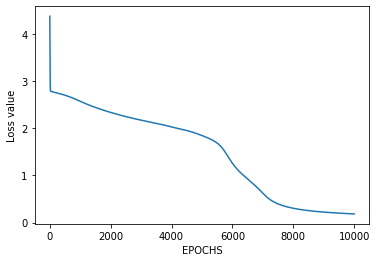

In [ ]:
import matplotlib.pyplot as plt

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

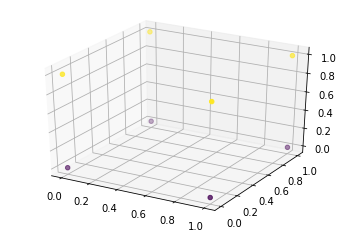

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = X[:, 0]
xdata = X[:, 1]
ydata = X[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata);

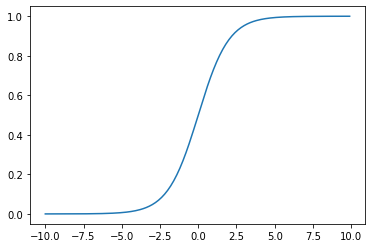

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.1)

def sign(u):
  a = []
  for i in u:
    a.append(1/(1+np.exp(-i)))
  return a

y = sign(x)

# plot the function
plt.plot(x, y)

# show the plot
plt.show()

# 5.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 4 выходами


In [ ]:
X = np.array([[1, 1, 1, 0, 1, 1, 1],
              [0, 0, 1, 0, 0, 0, 1],
              [0, 1, 1, 1, 1, 1, 0],
              [0, 1, 1, 1, 0, 1, 1],
              [1, 0, 1, 1, 0, 0, 1],
              [1, 1, 0, 1, 0, 1, 1],
              [1, 1, 0, 1, 1, 1, 1],
              [0, 1, 1, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 0, 1, 1]])

Y = np.array([[0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 1, 1],
              [0, 1, 0, 0],
              [0, 1, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 1]])

In [ ]:
Y.shape

(10, 4)

In [ ]:
def to_int(num_list):
    s = ''.join(map(str, num_list))
    return int(s, 2)

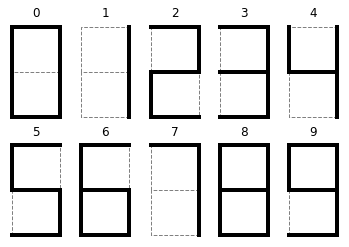

In [ ]:
for x_i, y_i in np.array(list(zip(X, Y))):

  u = to_int(list(y_i.ravel()))
  plt.subplot(2, 5, u+1)
  plt.title(str(u))
  
  plt.xlim([-0.1, 1.1])
  plt.ylim([-0.1, 2.1])

  ypoints = np.array([1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1])
  xpoints = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

  yindexes = []
  xindexes = []

  for j, x_j in np.ndenumerate(x_i.ravel()):
    j = int(j[0])
    if x_j == 1:
      ind = list([j*2, j*2+1])
      yindexes.append(np.squeeze(np.copy(ypoints[ind,])))
      xindexes.append(np.squeeze(np.copy(xpoints[ind,])))

  ypoints1 = np.array(yindexes)
  xpoints1 = np.array(xindexes)
  plt.plot(xpoints, ypoints, color = "gray", linewidth = 1, linestyle = 'dashed')
  for x, y in np.array(list(zip(xpoints1, ypoints1))):
    plt.plot(x, y, color = "black", linewidth = 4)
    
  plt.grid()
  plt.gca().axes.get_xaxis().set_visible(False)
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.axis('off')

plt.show()

In [ ]:
X.shape

(10, 7)

In [ ]:
Y.shape

(10, 10)

In [ ]:
num_data, input_dim = X.shape

In [ ]:
output_dim = len(Y.T)

In [ ]:
def sign(u):
  return 1 if (u > 0) else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1.0 - x)

def squared_err_derivative(y, y_pred):
  return y - y_pred

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sigmoid(sum)
  return y_pred

In [ ]:
%%time

np.random.seed(42)
lr = 0.01
num_iter = 10000
hidden_dim = 10
W1 = np.random.random((input_dim, hidden_dim))
W2 = np.random.random((hidden_dim, output_dim))
b1 = np.random.random(size=(num_data,1))
b2 = np.random.random(size=(1,1))
losses = []

for _ in range(num_iter):
      # feedforward
      layer0 = X
      layer1 = sigmoid(np.dot(layer0, W1) + b1)
      layer2 = sigmoid(np.dot(layer1, W2) + b2)

      # calc loss
      loss = -(1/2)*np.sum(Y*np.log(layer2)+(1-Y)*np.log(1-layer2))
      losses.append(loss)

      # backprop
      layer2_err = squared_err_derivative(Y, layer2) * sigmoid_derivative(layer2)
      layer1_err = np.dot(layer2_err, W2.T) * sigmoid_derivative(layer1)

      # upd weights
      W2 += lr * np.dot(layer1.T, layer2_err)
      W1 += lr * np.dot(layer0.T, layer1_err)

      # upd biases
      b2 += lr * np.sum(layer2_err)
      b1 += lr * np.sum(layer1_err)

CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 194 ms


In [ ]:
def predict(x):
  layer0 = x
  layer1 = sigmoid(np.dot(layer0, W1) + b1)
  layer2 = sigmoid(np.dot(layer1, W2) + b2)
  return np.around(layer2).astype(int)

In [ ]:
print(predict(X))

0
0
0
0
0
0
0
0
0
0


In [ ]:
for x_i, y_i in np.array(list(zip(X, predict(X)))):

  u = to_int(list(y_i.ravel()))
  plt.subplot(2, 5, u+1)
  plt.title(str(u))
  
  plt.xlim([-0.1, 1.1])
  plt.ylim([-0.1, 2.1])

  ypoints = np.array([1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1])
  xpoints = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

  yindexes = []
  xindexes = []

  for j, x_j in np.ndenumerate(x_i.ravel()):
    j = int(j[0])
    if x_j == 1:
      ind = list([j*2, j*2+1])
      yindexes.append(np.squeeze(np.copy(ypoints[ind,])))
      xindexes.append(np.squeeze(np.copy(xpoints[ind,])))

  ypoints1 = np.array(yindexes)
  xpoints1 = np.array(xindexes)
  
  plt.plot(xpoints, ypoints, color = "gray", linewidth = 1, linestyle = 'dashed')
  for x, y in np.array(list(zip(xpoints1, ypoints1))):
    plt.plot(x, y, color = "#3b3b3b", linewidth = 4)
    
  plt.grid()
  plt.gca().axes.get_xaxis().set_visible(False)
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.axis('off')

plt.show()

NameError: ignored

Text(0, 0.5, 'Loss value')

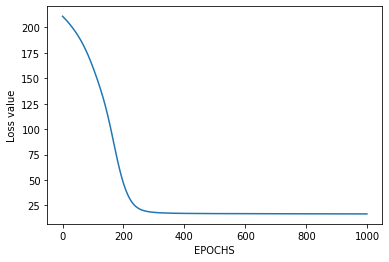

In [ ]:
# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

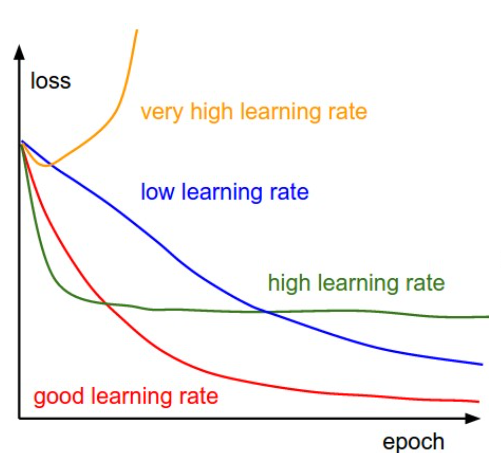

# 6.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 10  выходами. Визуализация индикатора

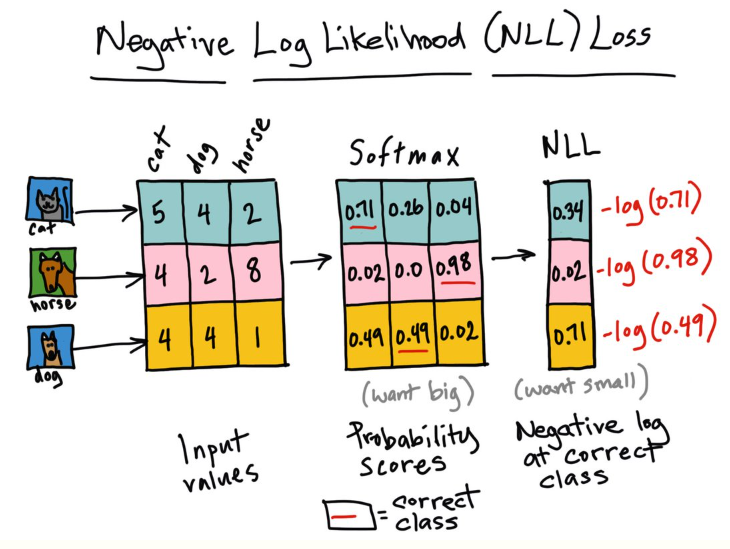

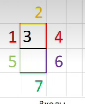

In [ ]:
X = np.array([[1, 1, 1, 0, 1, 1, 1],
              [0, 0, 1, 0, 0, 0, 1],
              [0, 1, 1, 1, 1, 1, 0],
              [0, 1, 1, 1, 0, 1, 1],
              [1, 0, 1, 1, 0, 0, 1],
              [1, 1, 0, 1, 0, 1, 1],
              [1, 1, 0, 1, 1, 1, 1],
              [0, 1, 1, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 0, 1, 1]])

Y = np.diag(np.full(10,1))

In [ ]:
num_data, n_features = X.shape
print(X.shape)

(10, 7)


In [ ]:
n_classes = len(Y.T)
print(len(Y.T))

10


In [ ]:
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def softmax_d(x):
  return (softmax(x) * np.identity(softmax(x).size) - softmax(x).T @ softmax(x))

def relu(x):
  return (np.maximum(0, x))

def relu_d(x):
  y = (x > 0) * 1
  return y

def log_softmax(y, y_pred):
  return -np.log(y_pred[np.argmax(y)][0])

def log_softmax_d(y, y_pred):
    return y_pred - y

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([0,0,0,0,1])

y_pred = softmax(x)
print(y_pred)

print(np.dot(log_softmax_d(y, y_pred),softmax_d(x)))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
[ 1.35867720e-04  1.00393421e-03  7.41812617e-03  5.48129504e-02
 -2.31392681e-01]


In [ ]:
np.random.seed(42)
lr = 0.01
num_iter = 1200
num_layers = 3

hidden_dim = 7

# init weights
weights={}
# input weights
weights['W1']=np.random.random((hidden_dim, n_features))
# output weights
weights['W'+str(num_layers)]=np.random.random((n_classes, hidden_dim))
for i in range(2, num_layers):
 # weights for hidden layers
  weights['W'+str(i)]=np.random.random((hidden_dim, hidden_dim))

# init biases
biases={}
# output layer bias
biases['b'+str(num_layers)]= np.random.random((n_classes,1))
for i in range(1, num_layers):
  # other layers bias
  biases['b'+str(i)]= np.random.random((hidden_dim,1))

losses = []
layers = {}
grads = {}

for _ in range(num_iter):
  for x_i, y_i in np.array(list(zip(X, Y))):
      y_i = np.expand_dims(y_i, axis=1) # true y
      layers['layer0'] = np.expand_dims(x_i, axis=1) # input layer
      # feedforward
      for i in range(1, num_layers):
        layers['layer'+str(i)] = relu(np.dot(weights['W'+str(i)], layers['layer'+str(i-1)]) + biases['b'+str(i)]) # hidden layers
      layers['layer'+str(num_layers)] = softmax(np.dot(weights['W'+str(num_layers)], layers['layer'+str(num_layers-1)]) + biases['b'+str(num_layers)]) # output layer
      # print(layers['layer'+str(num_layers)].shape)
      # backprop
      grads['grad'+str(num_layers)] = np.dot(softmax_d(layers['layer'+str(num_layers)]), log_softmax_d(y_i, layers['layer'+str(num_layers)]))
      for i in range(num_layers-1, 0, -1):
        grads['grad'+str(i)] = np.dot(weights['W'+str(i+1)].T, grads['grad'+str(i+1)]) * relu_d(layers['layer'+str(i)])
        
      # upd weights
      for i in range(num_layers, 0, -1):
        weights['W'+str(i)] -= lr * np.dot(grads['grad'+str(i)], layers['layer'+str(i-1)].T)

      # upd biases
      for i in range(num_layers, 0, -1):
        biases['b'+str(i)] -= lr * np.sum(grads['grad'+str(i)])

      # calc log loss
      loss = log_softmax(y_i, layers['layer'+str(num_layers)])
      losses.append(loss)
      print(x_i, 'loss=', loss)

Streaming output truncated to the last 5000 lines.
[1 1 1 0 1 1 1] loss= 0.3818676410887957
[0 0 1 0 0 0 1] loss= 0.9945401619276201
[0 1 1 1 1 1 0] loss= 1.9071725854400918
[0 1 1 1 0 1 1] loss= 0.9502879884088402
[1 0 1 1 0 0 1] loss= 1.5377370881911012
[1 1 0 1 0 1 1] loss= 1.4339265980927425
[1 1 0 1 1 1 1] loss= 1.322066696062636
[0 1 1 0 0 0 1] loss= 1.3337356035314323
[1 1 1 1 1 1 1] loss= 2.61596208158364
[1 1 1 1 0 1 1] loss= 2.1614577709317317
[1 1 1 0 1 1 1] loss= 0.37935151934341493
[0 0 1 0 0 0 1] loss= 0.9941527370499311
[0 1 1 1 1 1 0] loss= 1.9051558103451576
[0 1 1 1 0 1 1] loss= 0.9472693311903937
[1 0 1 1 0 0 1] loss= 1.53498264399032
[1 1 0 1 0 1 1] loss= 1.4306238557925497
[1 1 0 1 1 1 1] loss= 1.319403160216538
[0 1 1 0 0 0 1] loss= 1.3337670032561122
[1 1 1 1 1 1 1] loss= 2.617516332063283
[1 1 1 1 0 1 1] loss= 2.1621086662985487
[1 1 1 0 1 1 1] loss= 0.37685058022219364
[0 0 1 0 0 0 1] loss= 0.9937718672397791
[0 1 1 1 1 1 0] loss= 1.9031373596620496
[0 1 1 1 0 

In [ ]:
def predict(x):
  for x_i, y_i in np.array(list(zip(X, Y))):
    layers['layer0'] = np.expand_dims(x_i, axis=1) # input layer
    for i in range(1, num_layers):
      layers['layer'+str(i)] = relu(np.dot(weights['W'+str(i)], layers['layer'+str(i-1)]) + biases['b'+str(i)]) # hidden layers
    layers['layer'+str(num_layers)] = softmax(np.dot(weights['W'+str(num_layers)], layers['layer'+str(num_layers-1)]) + biases['b'+str(num_layers)]) # output layer
    print('Иксы ебучие: ', x_i, '\n Игреки ебучии: ', y_i.T, np.argmax(layers['layer'+str(num_layers)].T))

In [ ]:
predict(X)

Иксы ебучие:  [1 1 1 0 1 1 1] 
 Игреки ебучии:  [1 0 0 0 0 0 0 0 0 0] 0
Иксы ебучие:  [0 0 1 0 0 0 1] 
 Игреки ебучии:  [0 1 0 0 0 0 0 0 0 0] 1
Иксы ебучие:  [0 1 1 1 1 1 0] 
 Игреки ебучии:  [0 0 1 0 0 0 0 0 0 0] 2
Иксы ебучие:  [0 1 1 1 0 1 1] 
 Игреки ебучии:  [0 0 0 1 0 0 0 0 0 0] 3
Иксы ебучие:  [1 0 1 1 0 0 1] 
 Игреки ебучии:  [0 0 0 0 1 0 0 0 0 0] 4
Иксы ебучие:  [1 1 0 1 0 1 1] 
 Игреки ебучии:  [0 0 0 0 0 1 0 0 0 0] 5
Иксы ебучие:  [1 1 0 1 1 1 1] 
 Игреки ебучии:  [0 0 0 0 0 0 1 0 0 0] 6
Иксы ебучие:  [0 1 1 0 0 0 1] 
 Игреки ебучии:  [0 0 0 0 0 0 0 1 0 0] 7
Иксы ебучие:  [1 1 1 1 1 1 1] 
 Игреки ебучии:  [0 0 0 0 0 0 0 0 1 0] 8
Иксы ебучие:  [1 1 1 1 0 1 1] 
 Игреки ебучии:  [0 0 0 0 0 0 0 0 0 1] 9


Text(0, 0.5, 'Loss value')

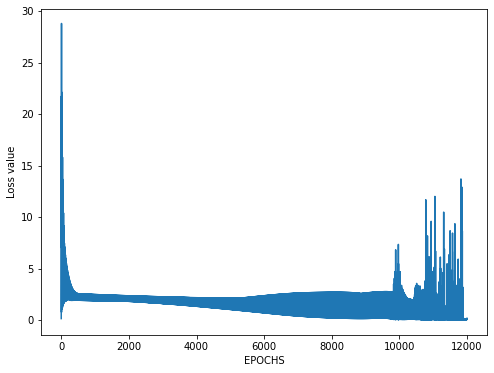

In [ ]:
# We plot losses to see how our network is doing
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

# 7.	Обучение нейронной сети для моделирования задач прогнозирования.

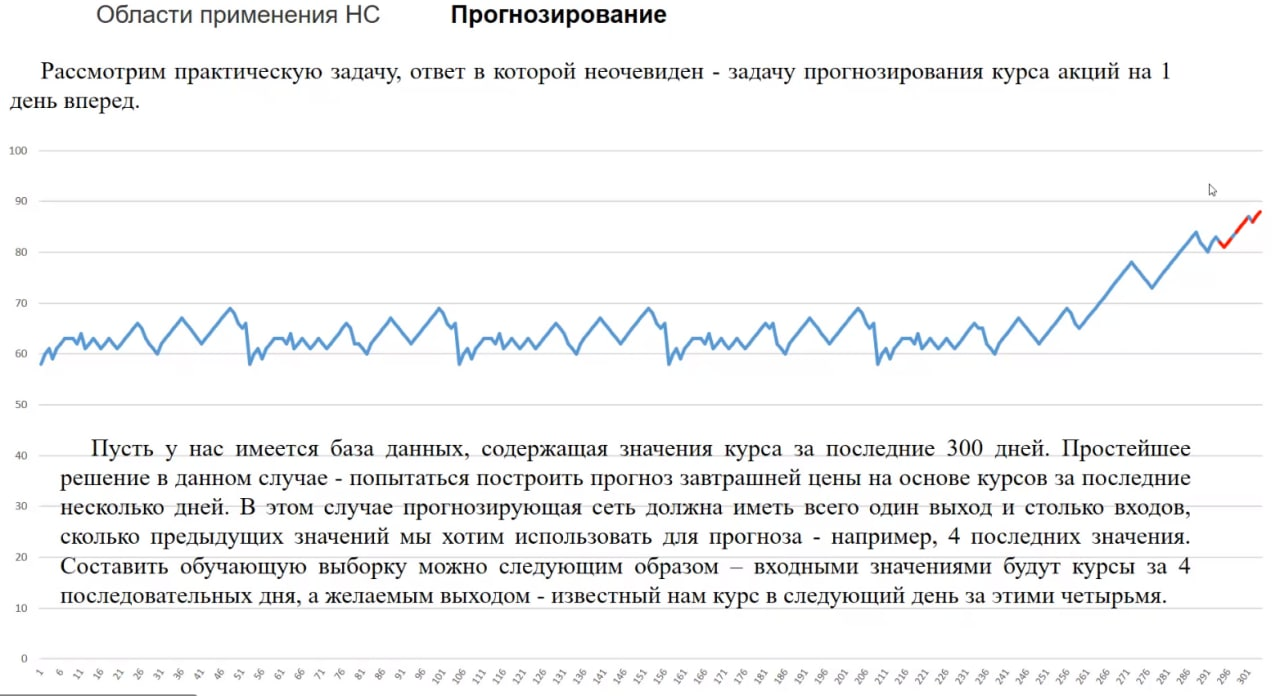

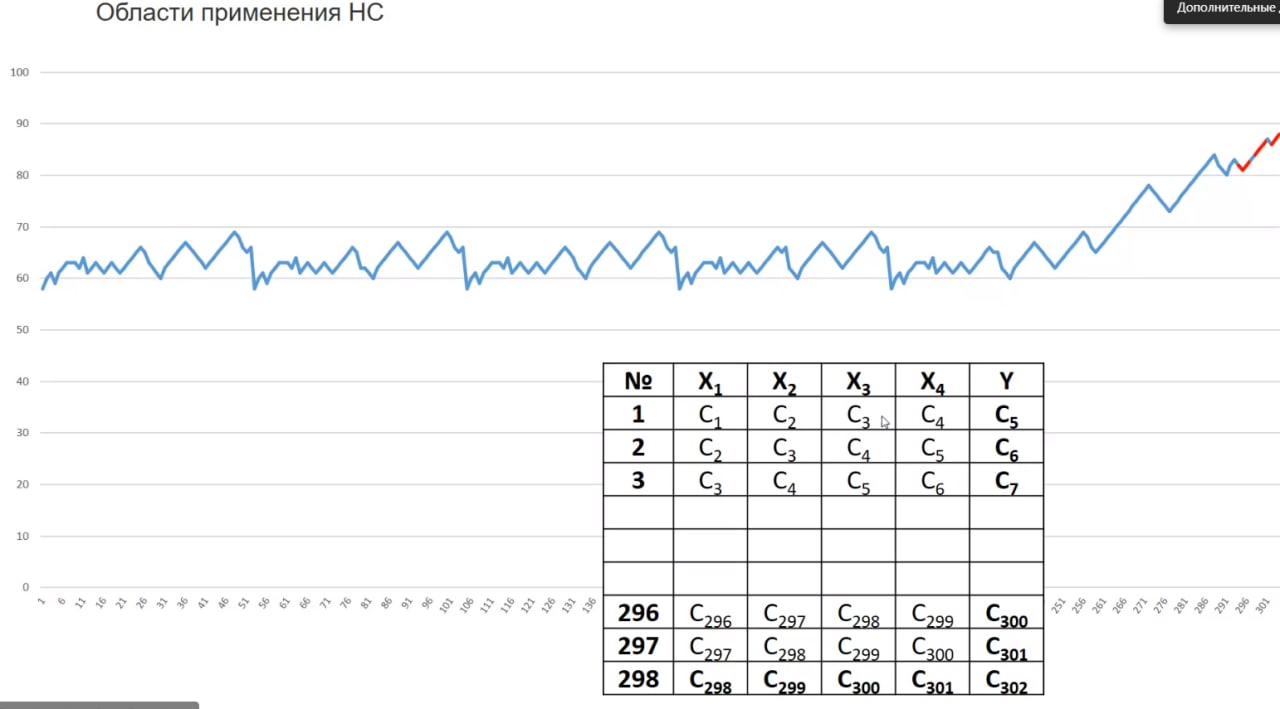

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DailyDelhiClimateTrain.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df.loc[(df['date'].dt.year == 2015)]

In [ ]:
df=df.drop(columns=['humidity',	'wind_speed',	'meanpressure'])

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df

,date,meantemp
0,2015-01-01,14.750
1,2015-01-02,14.875
2,2015-01-03,15.125
3,2015-01-04,14.125
4,2015-01-05,14.000
...,...,...
360,2015-12-27,15.375
361,2015-12-28,17.125
362,2015-12-29,16.375
363,2015-12-30,15.500


In [ ]:
df.isna().sum().sum()

0

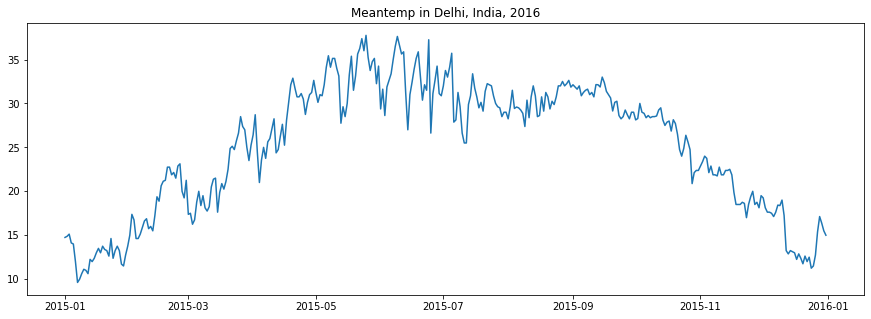

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Meantemp in Delhi, India, 2016')
plt.plot(df['date'], df['meantemp'])

In [ ]:
%%time
#optional
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    #find the end of this pattern
    end_ix = i + n_steps
    #check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #input and output sample data
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.asarray(X), np.asarray(y)
#choose a number of time steps
n_steps = 4
#split into samples
X, y = split_sequence(raw_seq, n_steps)

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 63.9 µs


In [ ]:
X, Y = split_sequence(df['meantemp'].to_numpy(), n_steps)

In [ ]:
num_data, n_features = X.shape
print(X.shape)

(361, 4)


In [ ]:
Y=np.expand_dims(Y, axis=1)
Y.shape

(361, 1)

In [ ]:
n_classes = len(Y.T)
print(n_classes)

1


In [ ]:
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def softmax_d(x):
  return (softmax(x) * np.identity(softmax(x).size) - softmax(x).T @ softmax(x))

def relu(x):
  return (np.maximum(0, x))

def relu_d(x):
  y = (x > 0) * 1
  return y

def mse_loss(y, y_pred):
    return np.mean((y - y_pred)**2)

def mse_loss_d(y, y_pred):
    N = y.shape[0]  
    return -2*(y - y_pred)/N

In [ ]:
np.random.seed(42)
lr = 0.00001
num_iter = 400
num_layers = 4

hidden_dim1 = 4
hidden_dim2 = 3
hidden_dim3 = 2

# init weights
weights={}
# input weights
weights['W1']=np.random.random((hidden_dim1, n_features))
# output weights
weights['W2']=np.random.random((hidden_dim2, hidden_dim1))
weights['W3']=np.random.random((hidden_dim3, hidden_dim2))
weights['W4']=np.random.random((n_classes, hidden_dim3))

# init biases
biases={}
# output layer bias
biases['b4']= np.random.random((n_classes,1))
biases['b3']= np.random.random((hidden_dim3,1))
biases['b2']= np.random.random((hidden_dim2,1))
biases['b1']= np.random.random((hidden_dim1,1))

losses = []
layers = {}
grads = {}

for _ in range(num_iter):
  for x_i, y_i in np.array(list(zip(X, Y))):
      y_i = np.expand_dims(y_i, axis=1) # true y
      layers['layer0'] = np.expand_dims(x_i, axis=1) # input layer
      # feedforward
      for i in range(1, num_layers):
        layers['layer'+str(i)] = relu(np.dot(weights['W'+str(i)], layers['layer'+str(i-1)]) + biases['b'+str(i)]) # hidden layers
      layers['layer'+str(num_layers)] = relu(np.dot(weights['W'+str(num_layers)], layers['layer'+str(num_layers-1)]) + biases['b'+str(num_layers)]) # output layer
      # print(layers['layer'+str(num_layers)].shape)
      # backprop
      grads['grad'+str(num_layers)] = mse_loss_d(y_i, layers['layer'+str(num_layers)]) * relu_d(layers['layer'+str(num_layers)])
      for i in range(num_layers-1, 0, -1):
        grads['grad'+str(i)] = np.dot(weights['W'+str(i+1)].T, grads['grad'+str(i+1)]) * relu_d(layers['layer'+str(i)])
        
      # upd weights
      for i in range(num_layers, 0, -1):
        weights['W'+str(i)] -= lr * np.dot(grads['grad'+str(i)], layers['layer'+str(i-1)].T)

      # upd biases
      for i in range(num_layers, 0, -1):
        biases['b'+str(i)] -= lr * np.sum(grads['grad'+str(i)])

      # calc log loss
      loss = mse_loss(y_i, layers['layer'+str(num_layers)])
      losses.append(loss)
      print(_, 'loss=', loss)

Streaming output truncated to the last 5000 lines.
386 loss= 1.8443957356143599
386 loss= 15.970928623520685
386 loss= 0.2410169190259462
386 loss= 2.215207947283017
386 loss= 0.22732918755314852
386 loss= 3.8909684601615564
386 loss= 3.0451427845980765
386 loss= 0.4283028078674183
386 loss= 2.1409696168619505
386 loss= 1.0907266064886494
386 loss= 0.523473152508205
386 loss= 0.18597031148086113
386 loss= 4.498839526418853
386 loss= 2.5550772162100825
386 loss= 1.0246159327342321
386 loss= 9.846252487422005
386 loss= 2.249263792072144
386 loss= 0.8448936806723429
386 loss= 0.34937856304868586
386 loss= 2.070188848101187
386 loss= 3.0231430457263153
386 loss= 7.95560046432836
386 loss= 1.6355904395770917
386 loss= 0.11446695994309271
386 loss= 1.650762854889174
386 loss= 0.7925334899832613
386 loss= 3.858399618295255
386 loss= 0.4522726272224527
386 loss= 0.21482685719660882
386 loss= 5.125381475903618
386 loss= 5.896554925018835
386 loss= 0.9079948926509243
386 loss= 0.9287327746762128

In [ ]:
np.sum(layers['layer'+str(num_layers)])

15.426172433183059

In [ ]:
def predict(x):
  test=[]
  for x_i in x:
    layers['layer0'] = np.expand_dims(x_i, axis=1) # input layer
    for i in range(1, num_layers):
      layers['layer'+str(i)] = relu(np.dot(weights['W'+str(i)], layers['layer'+str(i-1)]) + biases['b'+str(i)]) # hidden layers
    layers['layer'+str(num_layers)] = relu(np.dot(weights['W'+str(num_layers)], layers['layer'+str(num_layers-1)]) + biases['b'+str(num_layers)]) # output layer
    test.append(np.sum(layers['layer'+str(num_layers)]))
  return test

In [ ]:
check, y_check = split_sequence(df['meantemp'].tail(100).to_numpy(), n_steps)
che=predict(check)

Text(0, 0.5, 'Loss value')

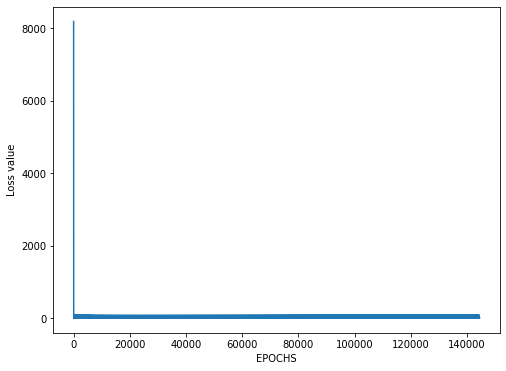

In [ ]:
# We plot losses to see how our network is doing
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

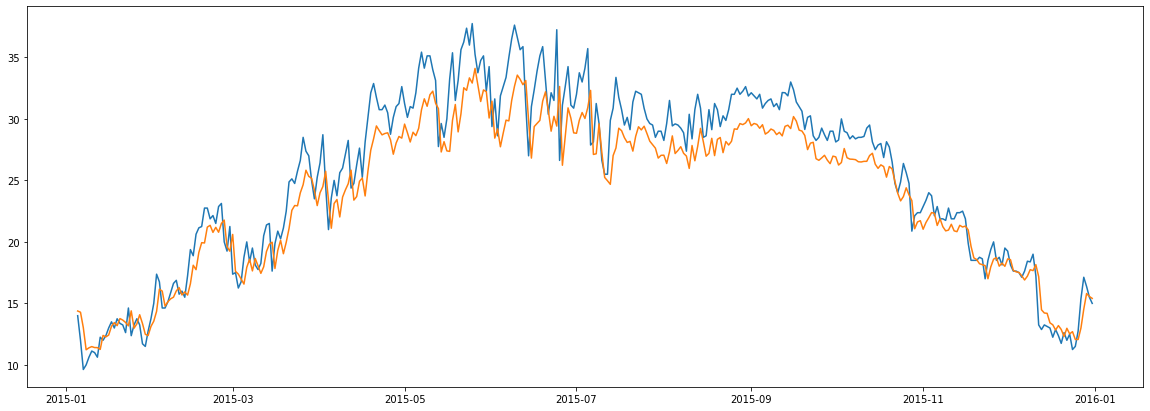

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(df['date'].tail(361), df['meantemp'].tail(361))
plt.plot(df['date'].tail(361), predict(X))


# 8.	Обучение нейронной сети для моделирования сети или карты Кохонена